# Chess (King-Rook vs. King) Veri Seti
Santranç son oyunu, tahtada birkaç taşın kaldığı bir durumdur. Karşı tarafın Şah-Kale’sine karşı Şah’a sahip olmak yaygın bir santranç oyunsonudur. 
Satranç oyununun sonucunu tahmin etmek için farklı algoritmalar kullanan birçok çalışma vardır. Bu çalışma Satranç Oyunsonu probleminin karar ağaçları yöntemi ile sınıflandırılması üzerinedir. 

## 1. Adım: Veri Setini İndirme ve İnceleme
https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/ adresinden krkopt.data veri seti indirilir.

In [3]:
import pandas as pd

# .data uzantılı veri setini yüklenir
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data',delimiter=',')

# .csv uzantılı dosyaya dönüştürülür ve kaydedilir
data.to_csv('krkopt.csv', index=False)

In [1]:
# Veri analizi ve görselleştirme için kullanılanacak Python kütüphaneleri (Pandas, Matplotlib ve Seaborn) içe aktarılır.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_csv("krkopt.csv", header=None)    # krkopt.csv dosyası okunur.

In [3]:
# Sütun başlıkları belirlenir
column_names = ['beyaz_kral_dikey', 'beyaz_kral_yatay', 'beyaz_kale_dikey', 'beyaz_kale_yatay', 'siyah_kral_dikey', 'siyah_kral_yatay', 'Sınıflar']

# Veri setinin sütun başlıkları güncellenir
dataFrame.columns = column_names
dataFrame.columns

Index(['beyaz_kral_dikey', 'beyaz_kral_yatay', 'beyaz_kale_dikey',
       'beyaz_kale_yatay', 'siyah_kral_dikey', 'siyah_kral_yatay', 'Sınıflar'],
      dtype='object')

In [4]:
dataFrame.head()

,beyaz_kral_dikey,beyaz_kral_yatay,beyaz_kale_dikey,beyaz_kale_yatay,siyah_kral_dikey,siyah_kral_yatay,Sınıflar
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [5]:
dataFrame.sample(5)     #Rastgele 5 gözlemi görüntüler

,beyaz_kral_dikey,beyaz_kral_yatay,beyaz_kale_dikey,beyaz_kale_yatay,siyah_kral_dikey,siyah_kral_yatay,Sınıflar
3504,d,1,e,3,h,1,five
1049,c,1,g,3,h,4,draw
19698,d,1,e,2,b,3,thirteen
23731,c,2,b,6,b,4,fourteen
15932,d,2,h,4,f,8,twelve


## 2. Adım: Veri Setinin Keşfi Ve Analizi

In [6]:
print(dataFrame.shape)  # veri setindeki satır ve sütun sayısı
print(dataFrame.size)   # veri setindeki toplam hücre sayısı

(28056, 7)
196392


In [7]:
dataFrame.describe()   # Veri setinin temel istatistiksel özetini sağlar.

,beyaz_kral_yatay,beyaz_kale_yatay,siyah_kral_yatay
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


In [8]:
dataFrame.dtypes   # Veri setindeki sütunların veri tiplerini görüntüler

beyaz_kral_dikey    object
beyaz_kral_yatay     int64
beyaz_kale_dikey    object
beyaz_kale_yatay     int64
siyah_kral_dikey    object
siyah_kral_yatay     int64
Sınıflar            object
dtype: object

In [9]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   beyaz_kral_dikey  28056 non-null  object
 1   beyaz_kral_yatay  28056 non-null  int64 
 2   beyaz_kale_dikey  28056 non-null  object
 3   beyaz_kale_yatay  28056 non-null  int64 
 4   siyah_kral_dikey  28056 non-null  object
 5   siyah_kral_yatay  28056 non-null  int64 
 6   Sınıflar          28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [10]:
dataFrame.isnull().sum()   #Veri setindeki eksik değerleri kontrol eder

beyaz_kral_dikey    0
beyaz_kral_yatay    0
beyaz_kale_dikey    0
beyaz_kale_yatay    0
siyah_kral_dikey    0
siyah_kral_yatay    0
Sınıflar            0
dtype: int64

## 3.Adım: Veri Setinin Görselleştirilmesi
Bu adım, veri seti hakkında genel bir fikir edinmemize yardımcı olabilir.

- Sınıf Dağılımının Görselleştirilmesi: Sınıfların dağılımını inceleyerek, hangi oyun sonu senaryolarının daha yaygın olduğu ve hangi senaryoların daha nadir olduğu belirlenebilir. 

In [11]:
classCounts = dataFrame['Sınıflar'].value_counts()

In [12]:
classCounts.values

array([4553, 4194, 3597, 2854, 2796, 2166, 1985, 1712, 1433,  683,  592,
        471,  390,  246,  198,   81,   78,   27], dtype=int64)

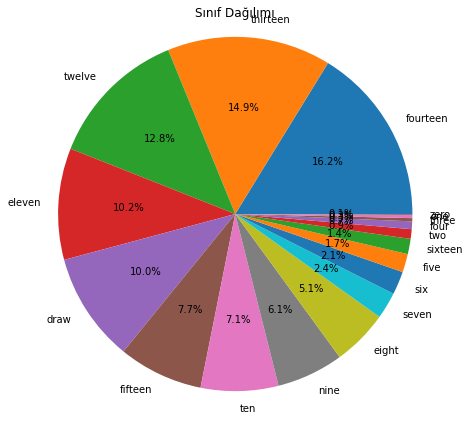

In [13]:
# Pie Chart
plt.figure(figsize=(7, 7))
labels = classCounts.index  # Sınıf etiketleri
sizes = classCounts.values  # Frekans değerleri

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Eşit oranda dağıtılmasını sağlar
plt.title('Sınıf Dağılımı')
plt.show()

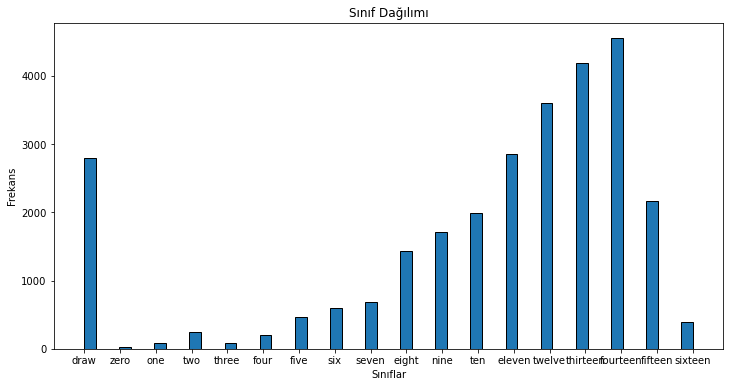

In [14]:
# Histogram
plt.figure(figsize=(12, 6))
plt.hist(dataFrame['Sınıflar'], bins='auto', edgecolor='black')
plt.xlabel('Sınıflar')
plt.ylabel('Frekans')
plt.title('Sınıf Dağılımı')
plt.show()

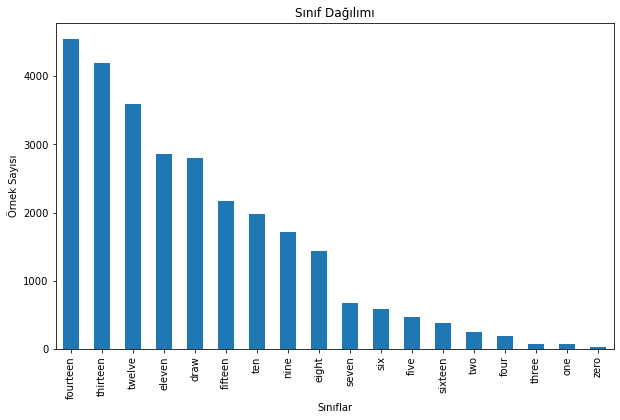

In [15]:
# Sınıf dağılımını hesaplayın
class_distribution = dataFrame["Sınıflar"].value_counts()

# Sınıf dağılımını görselleştirin
plt.figure(figsize=(10, 6))
class_distribution.plot(kind="bar")
plt.title("Sınıf Dağılımı")
plt.xlabel("Sınıflar")
plt.ylabel("Örnek Sayısı")
plt.show()

- Değişkenler Arasındaki İlişkinin Görselleştirilmesi:

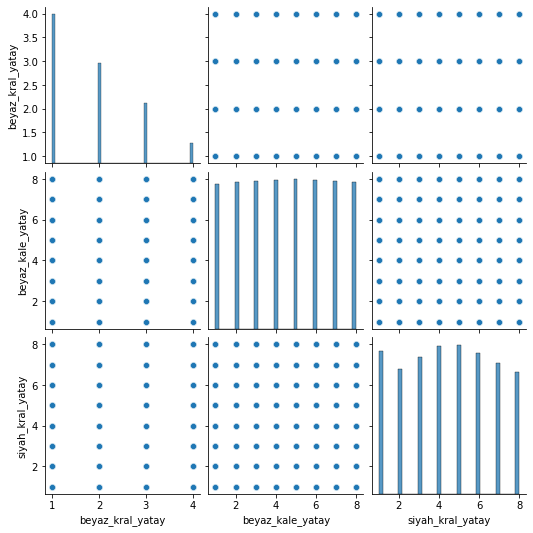

In [16]:
sbn.pairplot(dataFrame)   # Değişkenler arasındaki ilişkiyi görselleştirir. 

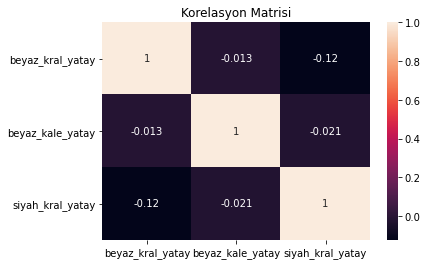

In [17]:
# Korelasyon matrisini hesaplama
correlation_matrix = dataFrame.corr()

# Isı haritasını çizme
sbn.heatmap(correlation_matrix, annot=True)

# Grafiği başlıklandırma
plt.title('Korelasyon Matrisi')

# Grafiği gösterme
plt.show()

## 4.Adım: Veri Önişleme
Veri ön işleme, veri setinin kalitesini artırmak, uygun bir formata getirmek ve modelin daha iyi performans göstermesini sağlamak amacıyla yapılır.Label encoding, veri analizinde veri ön işleme adımlarından biridir. Veri setinde bulunan kategorik özniteliklerin sayısal değerlere dönüştürülmesini sağlar. Bu adımda, kategorik özniteliklerin her bir kategori değeri, bir sayıya atanır ve bu sayılar veri setindeki ilgili öznitelik değerlerinin yerini alır. Bu sayede, kategorik veriler sayısal olarak temsil edilir ve analiz veya modelleme sürecinde kullanılabilir hale gelir. 

In [18]:
from sklearn.preprocessing import LabelEncoder

# Veri setindeki kategorik öznitelikleri içeren bir liste oluşturulur.
kategorik_oznitelikler = ['beyaz_kral_dikey', 'beyaz_kale_dikey', 'siyah_kral_dikey']

# LabelEncoder sınıfını kullanarak dönüşüm yapmak için bir nesne oluşturulur.
label_encoder = LabelEncoder()

# Kategorik öznitelikler dönüştürülür.
for oznitelik in kategorik_oznitelikler:
    dataFrame[oznitelik] = label_encoder.fit_transform(dataFrame[oznitelik])


In [19]:
# Dönüşümü tamamladıktan sonra güncellenmiş veri seti kontrol edilir.
dataFrame.head()

,beyaz_kral_dikey,beyaz_kral_yatay,beyaz_kale_dikey,beyaz_kale_yatay,siyah_kral_dikey,siyah_kral_yatay,Sınıflar
0,0,1,1,3,2,2,draw
1,0,1,2,1,2,2,draw
2,0,1,2,1,3,1,draw
3,0,1,2,1,3,2,draw
4,0,1,2,2,2,1,draw


## 5.Adım: Veri Setinin Bölünmesi
Bu adımda veri seti eğitim ve test verileri olarak ikiye ayrılır. 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.model_selection import train_test_split

# Öznitelikler ve hedef değişkeni ayrıştırma
X = dataFrame.drop('Sınıflar', axis=1)  # Öznitelikler
y = dataFrame['Sınıflar']  # Hedef değişken

# Veri seti eğitim ve test setlerine bölünür.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 6.Adım: Karar Ağacı Modelini Oluşturma ve Eğitme

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Karar Ağacı sınıflandırıcısı oluşturulur.
model = DecisionTreeClassifier()

# Model eğitilir.
model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapılır.
y_predict=model.predict(X_test)

## 7.Adım: Karar Ağacı Modelinin Değerlendirilmesi
Modelin performansının değerlendirildiği adımdır. Bu adımda, Accuracy, sensitivity, specificity, F-measure gibi ölçütler kullanılmıştır.

In [23]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict,average='macro')
recall = recall_score(y_test, y_predict,average='macro')
f1 = f1_score(y_test, y_predict,average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",f1)

Accuracy: 0.8499643620812545
Precision: 0.862096590977208
Recall: 0.8649920726948842
F1 Score: 0.8596236748873494


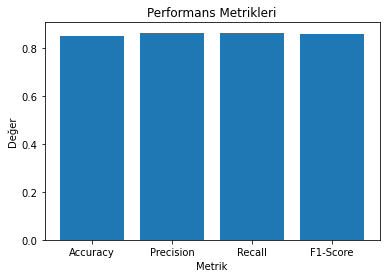

In [24]:
# Metrik değerleri ve etiketleri
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]

# Çubuk grafiği oluşturma
plt.bar(metrics, values)
plt.xlabel('Metrik')
plt.ylabel('Değer')
plt.title('Performans Metrikleri')
plt.show()

In [25]:
# Modelin sınıflandırma sonuçlarını gerçek değerlerle karşılaştırmak için karmaşıklık matrisi kullanılır.
from sklearn.metrics import confusion_matrix

# Karmaşıklık matrisini oluşturma
cm = confusion_matrix(y_test, y_predict)

print("Karmaşıklık Matrisi:")
print(cm)


Karmaşıklık Matrisi:
[[405  11  23  25   2   0  15  11   0   8   4   5  12  16   0  11   1   0]
 [  8 249   1   0   0   0   0  12   0  14   1   0   1   1   0   0   0   0]
 [ 13   1 506   1   0   0   3   8   0   0   0   0  21  13   0  43   0   0]
 [ 11   0   1 355   0   0  29   0   0   0   0   8   0   2   0   0   0   0]
 [  0   1   0   0  87   0   0   0   1   0   1   0   0   0   2   0   0   0]
 [  2   0   0   0   3  31   0   0   0   0   1   0   1   0   3   0   0   0]
 [  8   0   0  35   0   0 828   0   0   0   0   0   1  45   0   5   0   0]
 [  7  12   7   0   0   0   0 294   1   0   2   0  19   0   0   4   0   0]
 [  0   1   0   0   0   0   0   0  20   0   0   0   0   0   0   0   1   0]
 [  4   9   0   1   1   0   0   3   0 104   5   0   0   0   0   2   0   0]
 [  2   2   0   0   0   0   0   0   0   7 117   0   0   0   0   0   0   0]
 [  2   0   0   7   0   0   0   0   0   0   0  67   0   0   0   0   0   0]
 [  6   1  25   0   0   0   0  17   0   1   2   0 315   0   0   4   0   0]
 [  